In [1]:
import os
import zipfile
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

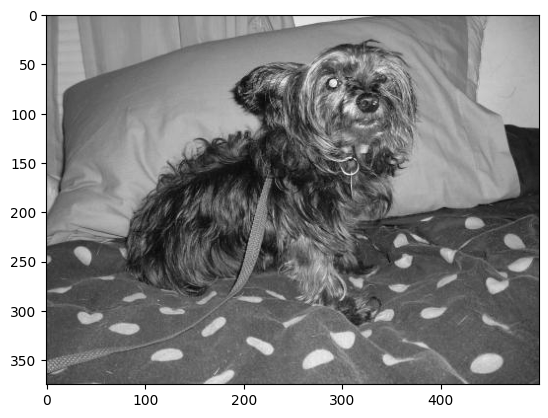

In [2]:
DATADIR = ".\PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
print(len(os.listdir('./PetImages/Cat/')))
print(len(os.listdir('./PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [4]:
try:
    os.mkdir('./cats-v-dogs')
    os.mkdir('./cats-v-dogs/training')
    os.mkdir('./cats-v-dogs/testing')
    os.mkdir('./cats-v-dogs/training/cats')
    os.mkdir('./cats-v-dogs/training/dogs')
    os.mkdir('./cats-v-dogs/testing/cats')
    os.mkdir('./cats-v-dogs/testing/dogs')
except OSError:
    pass

In [5]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "./PetImages/Cat/"
TRAINING_CATS_DIR = "./cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "./cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "./PetImages/Dog/"
TRAINING_DOGS_DIR = "./cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "./cats-v-dogs/testing/dogs/"

split_size = .7
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [6]:
print(len(os.listdir('./cats-v-dogs/training/cats/')))
print(len(os.listdir('./cats-v-dogs/training/dogs/')))
print(len(os.listdir('./cats-v-dogs/testing/cats/')))
print(len(os.listdir('./cats-v-dogs/testing/dogs/')))

11384
11374
6384
6374


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [8]:

TRAINING_DIR = "./cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "./cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22756 images belonging to 2 classes.
Found 12756 images belonging to 2 classes.


In [9]:
# Note that this may take some time.
history = model.fit(train_generator, epochs=100, steps_per_epoch=90,
                    validation_data=validation_generator, validation_steps=6)

Epoch 1/100
84/90 [===========================>..] - ETA: 2s - loss: 0.7746 - acc: 0.5793

C:\Users\harry\anaconda3\envs\tf-gpu\lib\site-packages\PIL\TiffImagePlugin.py:850: UserWarning: Truncated File Read
  warnings.warn(str(msg))


90/90 [==============================] - 47s 461ms/step - loss: 0.7622 - acc: 0.5874 - val_loss: 0.5764 - val_acc: 0.7073
Epoch 2/100
90/90 [==============================] - 17s 189ms/step - loss: 0.5973 - acc: 0.6837 - val_loss: 0.5758 - val_acc: 0.6993
Epoch 3/100
90/90 [==============================] - 17s 185ms/step - loss: 0.5422 - acc: 0.7242 - val_loss: 0.5354 - val_acc: 0.7287
Epoch 4/100
90/90 [==============================] - 17s 184ms/step - loss: 0.4865 - acc: 0.7653 - val_loss: 0.5238 - val_acc: 0.7340
Epoch 5/100
90/90 [==============================] - 16s 180ms/step - loss: 0.4436 - acc: 0.7906 - val_loss: 0.5534 - val_acc: 0.7247
Epoch 6/100
90/90 [==============================] - 16s 177ms/step - loss: 0.4057 - acc: 0.8110 - val_loss: 0.3544 - val_acc: 0.8280
Epoch 7/100
90/90 [==============================] - 16s 175ms/step - loss: 0.3709 - acc: 0.8295 - val_loss: 0.3197 - val_acc: 0.8640
Epoch 8/100
90/90 [==============================] - 16s 175ms/step - loss

Epoch 62/100
90/90 [==============================] - 15s 170ms/step - loss: 0.0029 - acc: 0.9994 - val_loss: 0.4949 - val_acc: 0.9360
Epoch 63/100
90/90 [==============================] - 15s 169ms/step - loss: 0.1562 - acc: 0.9793 - val_loss: 0.1547 - val_acc: 0.9673
Epoch 64/100
90/90 [==============================] - 15s 169ms/step - loss: 6.1931e-04 - acc: 1.0000 - val_loss: 0.2278 - val_acc: 0.9687
Epoch 65/100
90/90 [==============================] - 15s 170ms/step - loss: 0.1331 - acc: 0.9821 - val_loss: 0.2383 - val_acc: 0.9673
Epoch 66/100
90/90 [==============================] - 15s 169ms/step - loss: 0.0254 - acc: 0.9942 - val_loss: 0.2365 - val_acc: 0.9707
Epoch 67/100
90/90 [==============================] - 15s 170ms/step - loss: 0.1559 - acc: 0.9803 - val_loss: 0.1613 - val_acc: 0.9700
Epoch 68/100
90/90 [==============================] - 15s 169ms/step - loss: 0.0816 - acc: 0.9872 - val_loss: 0.1811 - val_acc: 0.9727
Epoch 69/100
90/90 [==============================]

<Figure size 640x480 with 0 Axes>

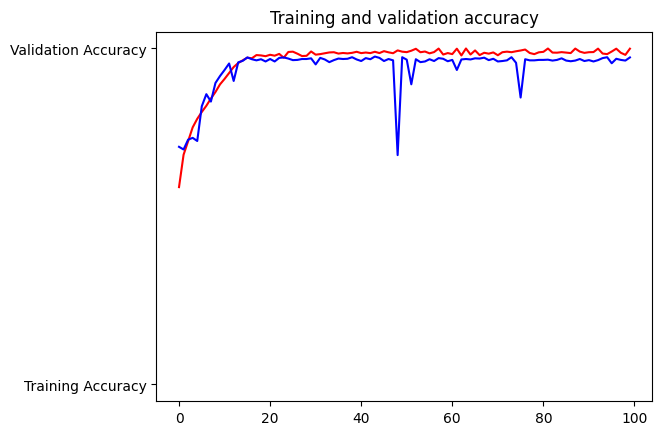

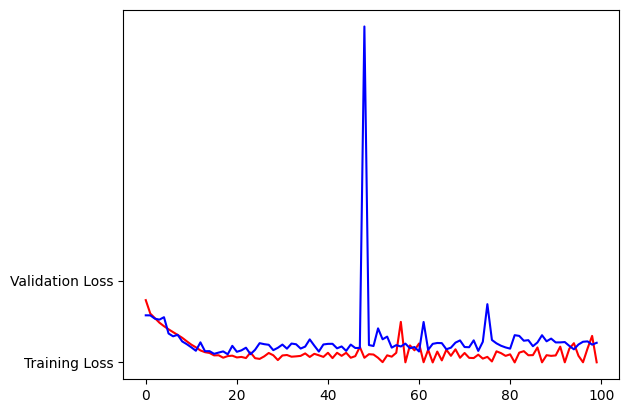

<Figure size 640x480 with 0 Axes>

In [10]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [22]:
model.save('cats_and_dogs.model')

INFO:tensorflow:Assets written to: cats_and_dogs.model\assets
